In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import and Inspect Data

In [43]:
data = pd.read_csv('all_data.csv')
data.describe().round(3)

C:\Users\sangd\AppData\Local\Temp\ipykernel_22064\1977694747.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('all_data.csv')


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.764110e+05,2.764110e+05,276411.000,276411.000,234923.000,276411.000,276411.000,214920.000,276411.000,276411.000,276411.000
mean,4.293345e+17,1.811940e+08,34.501,-105.899,272.444,14.152,42.779,1.537,33.294,186.032,10.667
std,4.442696e+17,1.769591e+08,7.028,26.432,893.276,27.133,85.405,1.801,95.841,129.622,18.645
min,6.000000e+00,2.300000e+01,18.920,-159.715,5.000,1.000,0.000,0.010,1.000,0.000,0.000
25%,3.274332e+07,2.692495e+07,30.282,-118.636,99.000,1.000,1.000,0.280,1.000,65.000,0.000
50%,5.440883e+07,1.081869e+08,34.490,-114.926,159.000,3.000,9.000,0.970,3.000,190.000,2.000
75%,8.715867e+17,3.317395e+08,40.685,-80.141,271.000,30.000,45.000,2.260,16.000,309.000,14.000
max,1.160946e+18,5.774373e+08,47.734,-70.996,100000.000,1250.000,3599.000,88.950,837.000,365.000,1049.000


In [42]:
total_nan = data.isnull().sum()
print('total nan value:', total_nan)

total nan value: id                                     0
name                                   3
host_id                                0
host_name                             15
neighbourhood_group               147456
neighbourhood                        928
latitude                               0
longitude                              0
room_type                              0
price                              41488
minimum_nights                         0
number_of_reviews                      0
last_review                        61491
reviews_per_month                  61491
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
license                           176826
city                                   0
dtype: int64


we're not gonna use name or neighborhood columns. I think we should drop observations that NaN for `price` column. For last_review and reviews_per_month, probably these listings are too new and never been rent, so we can set these to 0

In [45]:
# Remove rows with NaN in 'price' column
data = data.dropna(subset=['price'])
# Set NaN values in 'last_review' and 'reviews_per_month' to 0
data['last_review'].fillna(0, inplace=True)
data['reviews_per_month'].fillna(0, inplace=True)
total_nan = data.isnull().sum()
print('total nan value:', total_nan)

total nan value: id                                     0
name                                   0
host_id                                0
host_name                              6
neighbourhood_group               132127
neighbourhood                        846
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                            0
reviews_per_month                      0
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
license                           143456
city                                   0
dtype: int64


C:\Users\sangd\AppData\Local\Temp\ipykernel_22064\2530083131.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['last_review'].fillna(0, inplace=True)
C:\Users\sangd\AppData\Local\Temp\ipykernel_22064\2530083131.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [46]:
for c in data.columns:
    print(f"Column: {c:<20} | # unique values: {np.ma.count(data[c].unique()):<9} | dtype: {type(data[c][1000])}")

Column: id                   | # unique values: 234922    | dtype: <class 'numpy.int64'>
Column: name                 | # unique values: 212678    | dtype: <class 'str'>
Column: host_id              | # unique values: 104510    | dtype: <class 'numpy.int64'>
Column: host_name            | # unique values: 27797     | dtype: <class 'str'>
Column: neighbourhood_group  | # unique values: 35        | dtype: <class 'float'>
Column: neighbourhood        | # unique values: 1468      | dtype: <class 'str'>
Column: latitude             | # unique values: 186298    | dtype: <class 'numpy.float64'>
Column: longitude            | # unique values: 187711    | dtype: <class 'numpy.float64'>
Column: room_type            | # unique values: 4         | dtype: <class 'str'>
Column: price                | # unique values: 2544      | dtype: <class 'numpy.float64'>
Column: minimum_nights       | # unique values: 148       | dtype: <class 'numpy.int64'>
Column: number_of_reviews    | # unique values: 957  

In [47]:
# dropping columns that I think not neccessary for now. please read README.md and consider `city` and `last_review`
data2 = data.drop(columns=['id','name','host_id','host_name','neighbourhood_group', 'neighbourhood','license', 'city', 'last_review'])
print(data2.columns)
data2.describe()

Index(['latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,234923.000000,234923.000000,234923.000000,234923.000000,234923.000000,234923.000000,234923.000000,234923.000000,234923.000000
mean,34.278106,-107.195859,272.444163,12.555752,46.966270,1.331212,34.922885,210.653916,12.089523
std,7.182372,26.415946,893.275910,22.842342,89.798998,1.779040,98.099459,117.268035,19.538720
min,18.920250,-159.714620,5.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.255594,-121.912466,99.000000,1.000000,1.000000,0.090000,1.000000,104.000000,0.000000
50%,34.174303,-115.163680,159.000000,2.000000,11.000000,0.680000,3.000000,232.000000,3.000000
75%,40.650782,-80.313660,271.000000,30.000000,52.000000,2.030000,18.000000,321.000000,17.000000
max,47.734087,-70.996000,100000.000000,1100.000000,3599.000000,88.950000,837.000000,365.000000,1049.000000


# Convert room_type into integer values

In [49]:
print(data2['room_type'].unique())
room_type_dict = {'Entire home/apt':0, 'Private room':1, 'Shared room':2, 'Hotel room':3} # might be changed later
data2['room_type'] = data2['room_type'] .replace(room_type_dict)
print(data2['room_type'].unique())


['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']
[0 1 2 3]


C:\Users\sangd\AppData\Local\Temp\ipykernel_22064\3723430944.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2['room_type'] = data2['room_type'] .replace(room_type_dict)


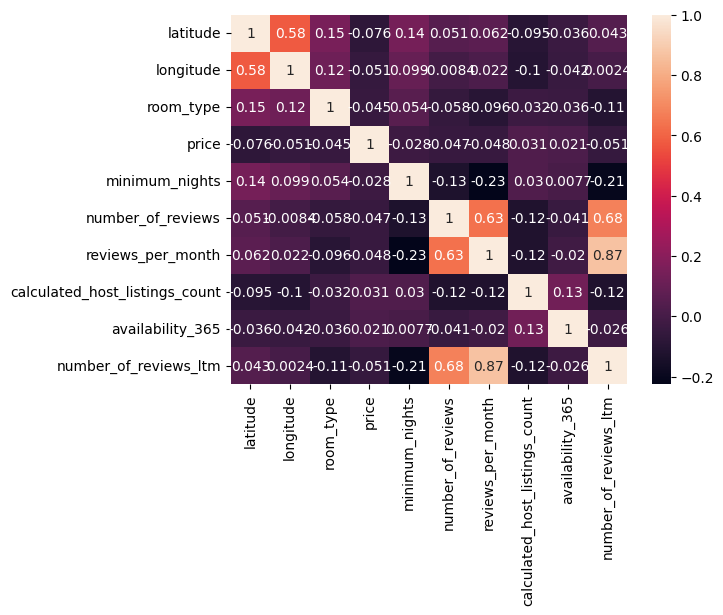

In [7]:
sns.heatmap(data2.corr(), annot=True)
plt.show()

It makes sense that `longtitude` and `lattitude` are quite correlated, the number would increase if we only do either east coast or west coast cities. We're doing the ~35 cities in the USA tho. It also expected that `number_of_reviews`, `reviews_per_month`, and `number_of_reviews_ltm` are closely correlated.

# Consider:
Normalize standardize data so the correlation is more obvious

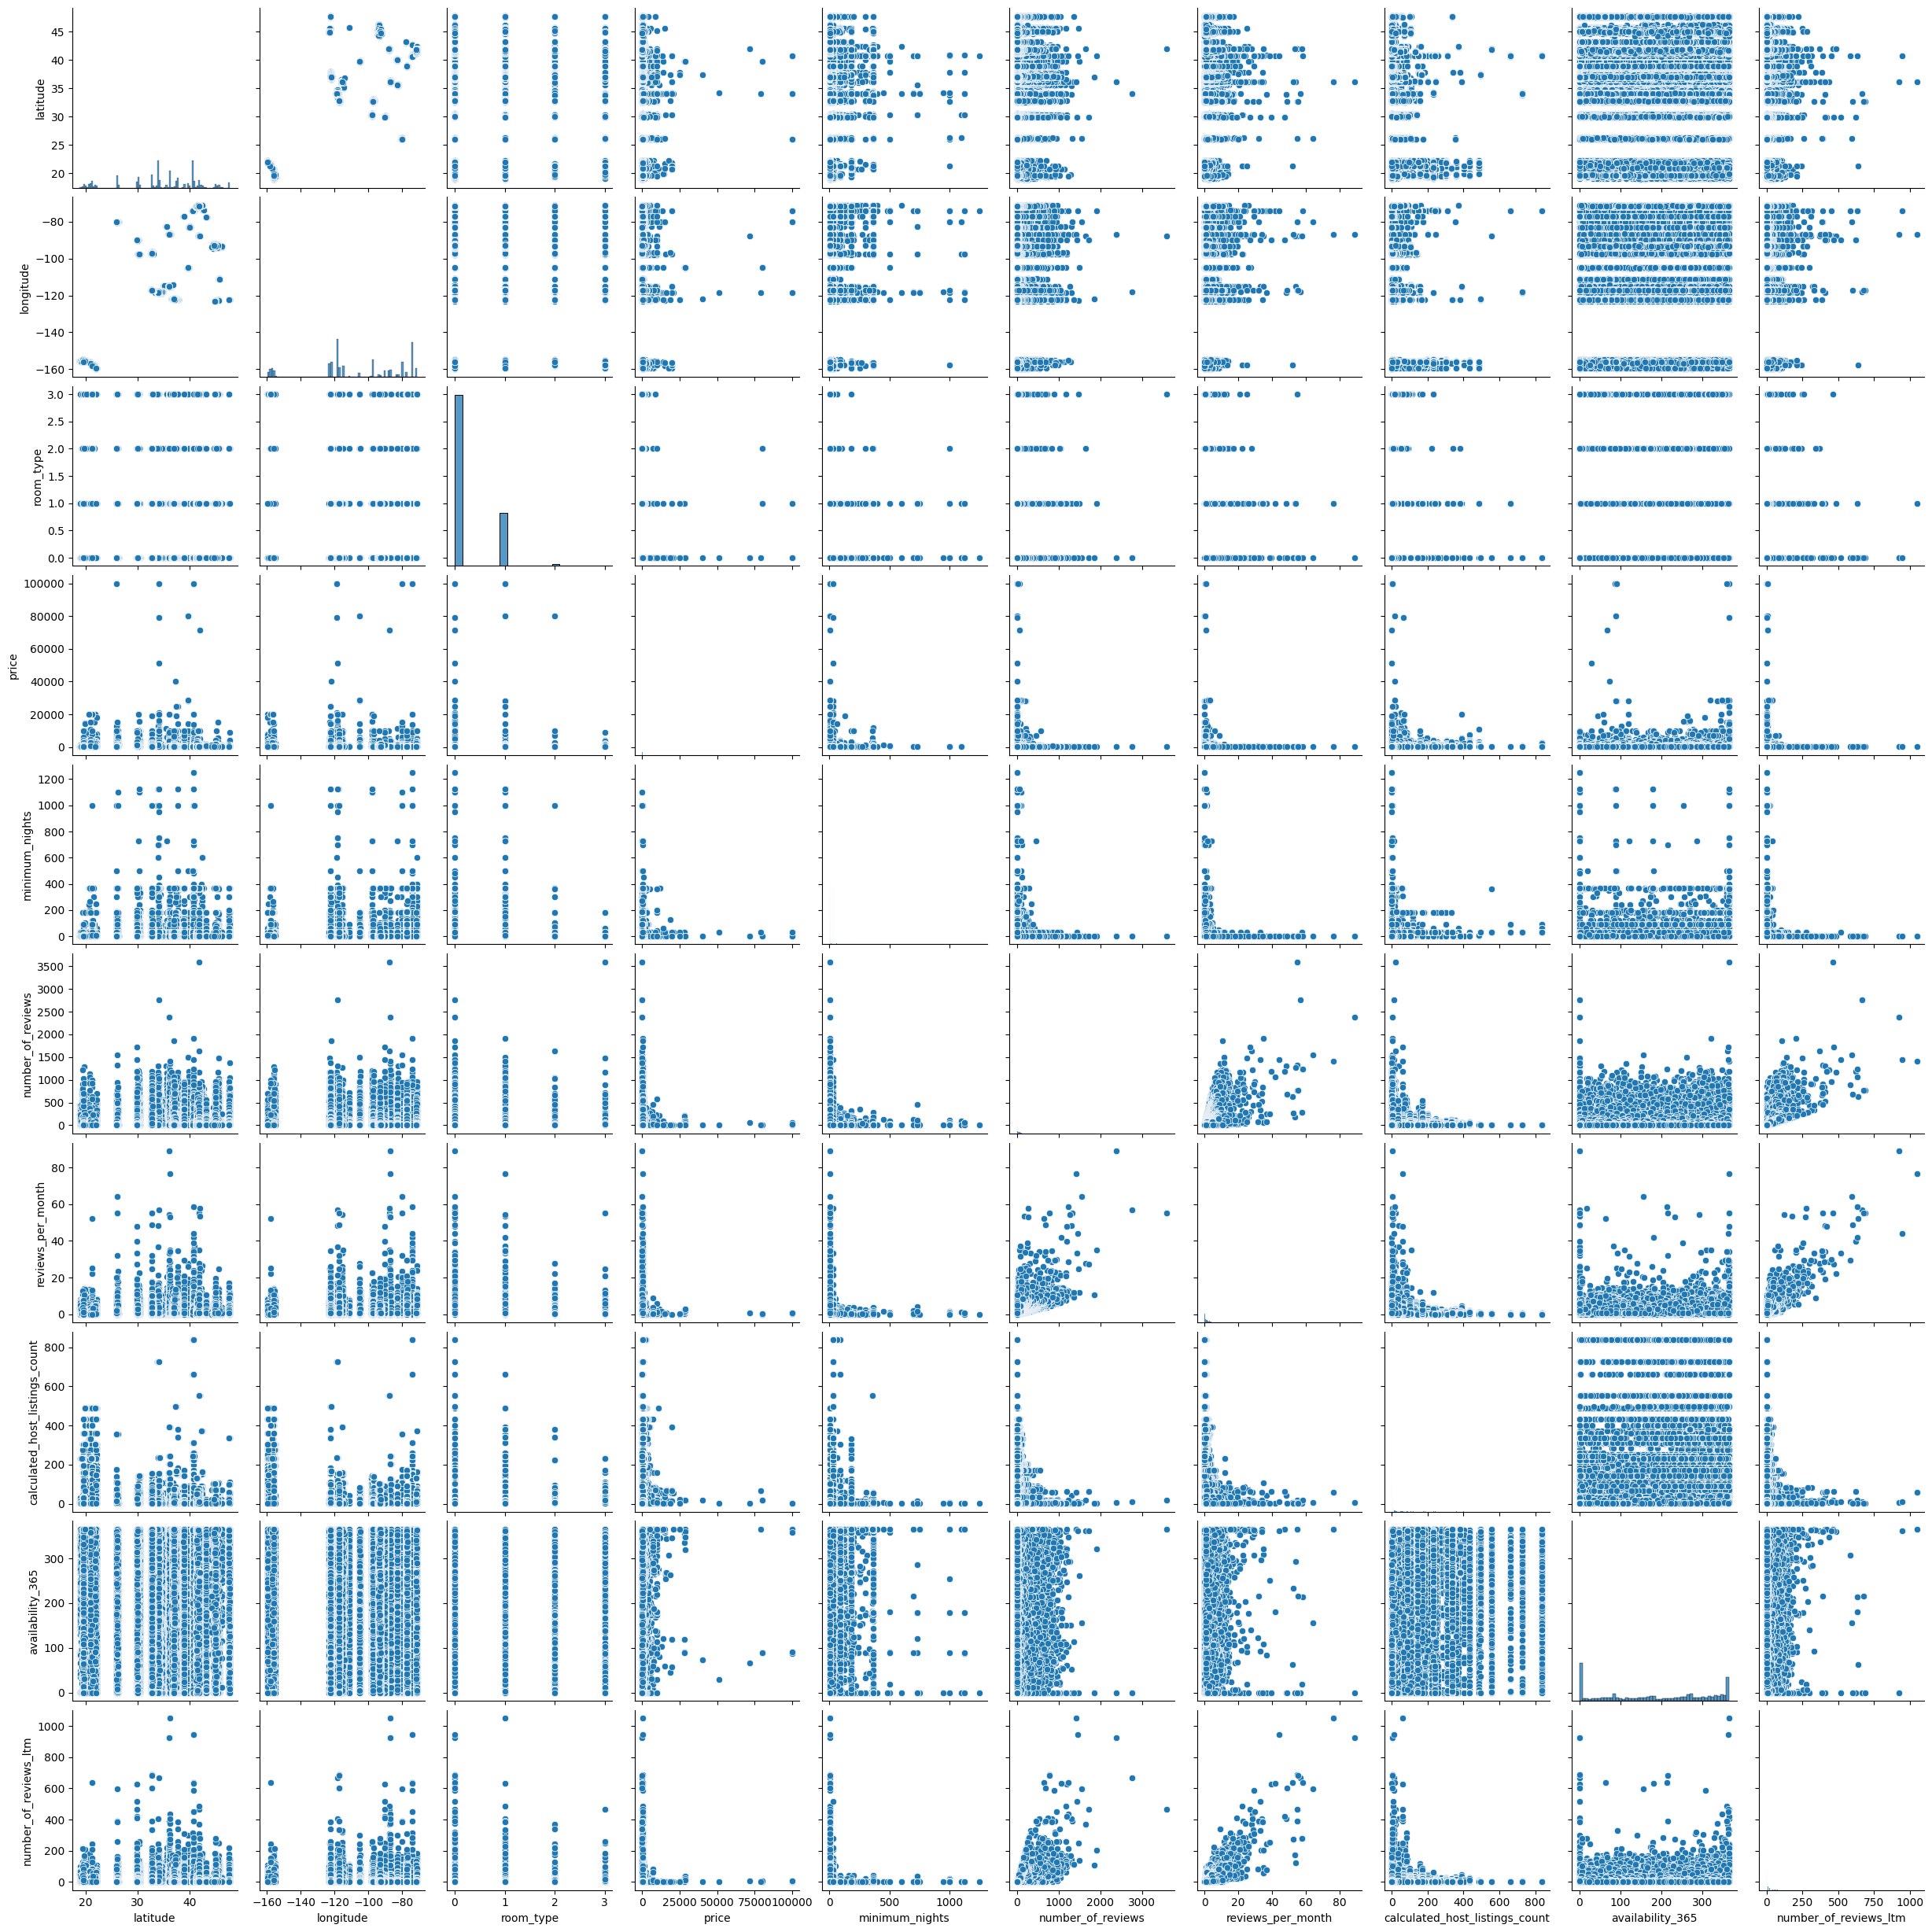

In [12]:
sns.pairplot(data2)

Consider: remove the outliners and abnomalities so the plots are not so squeezed. Someone in group can analyze original data, while other can analyze the data without outliners

## Explore for Unsupervised Learning

What are we looking for? Ideas:
  1. There are lots of information (for examples, number of beds, baths, distance to attraction, pets allow...) in `name`. We can create a tokens/keywords list, use cluster to see how keywords are related in term of pricing, room type, locations, ...
  2. create new column `income` which is calculated by `price` and `reviews_per_month`. Then assign each observation into groups, maybe 4 groups: `low_income` if `income<=500`> , `medium_income` if `income<=2000`>, `high_income`, `super_high_income`. Again, run PCA and clustering to see if there's an underline pattern that put an observation into its income group. 
For now, we perfom PCA on the dataset with sklearn. With further thinking, we may drop or re-add columns, and we'll decide and apply clustering on chosen idea.

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)

In [50]:
print(f"data2 means:\n{data2.mean()}\n\ndata2 variance:\n{data2.var()}")

data2 means:
latitude                           34.278106
longitude                        -107.195859
room_type                           0.234490
price                             272.444163
minimum_nights                     12.555752
number_of_reviews                  46.966270
reviews_per_month                   1.331212
calculated_host_listings_count     34.922885
availability_365                  210.653916
number_of_reviews_ltm              12.089523
dtype: float64

data2 variance:
latitude                              51.586470
longitude                            697.802207
room_type                              0.208442
price                             797941.852029
minimum_nights                       521.772582
number_of_reviews                   8063.859974
reviews_per_month                      3.164982
calculated_host_listings_count      9623.503891
availability_365                   13751.792030
number_of_reviews_ltm                381.761590
dtype: float64


In [51]:
scaler = StandardScaler(with_std=True, with_mean=True)
scaled_data = scaler.fit_transform(data2)

In [52]:
has_nan = np.isnan(scaled_data).sum()
print(f"Array has NaN values: {has_nan}")
nan_indices = np.argwhere(np.isnan(scaled_data))
print("Indices of NaN values:")
print(nan_indices)

Array has NaN values: 0
Indices of NaN values:
[]


In [53]:
pca = PCA()
pca.fit(scaled_data)
print(pca.mean_)  # means should be 0 after scaler()?

[-7.74291748e-16 -1.85830020e-16 -9.35199252e-17 -1.93572937e-17
  7.86390057e-18 -1.45179703e-18 -1.74215643e-16 -8.71078217e-18
 -1.06707082e-16  1.93572937e-18]


In [58]:
scores = pca.transform(scaled_data)
print(pca.components_.shape)

(10, 10)


latitude (i,k)=0,0, (j,k)=1,0 0.07033626091551293 0.643164507311426
longitude (i,k)=0,1, (j,k)=1,1 0.046064414400339676 0.6250078271899746
room_type (i,k)=0,2, (j,k)=1,2 -0.06918906517891858 0.2855873231625711
price (i,k)=0,3, (j,k)=1,3 -0.055711474125480276 -0.14562036989129534
minimum_nights (i,k)=0,4, (j,k)=1,4 -0.20976059735967872 0.24353289293084213
number_of_reviews (i,k)=0,5, (j,k)=1,5 0.4984128902699409 -0.010156354339605165
reviews_per_month (i,k)=0,6, (j,k)=1,6 0.5644249950868577 -0.017539044641926682
calculated_host_listings_count (i,k)=0,7, (j,k)=1,7 -0.16874601858297922 -0.1722915925446529
availability_365 (i,k)=0,8, (j,k)=1,8 -0.16512135919701226 0.05133117863916266
number_of_reviews_ltm (i,k)=0,9, (j,k)=1,9 0.5641889847519288 -0.03001497769332763


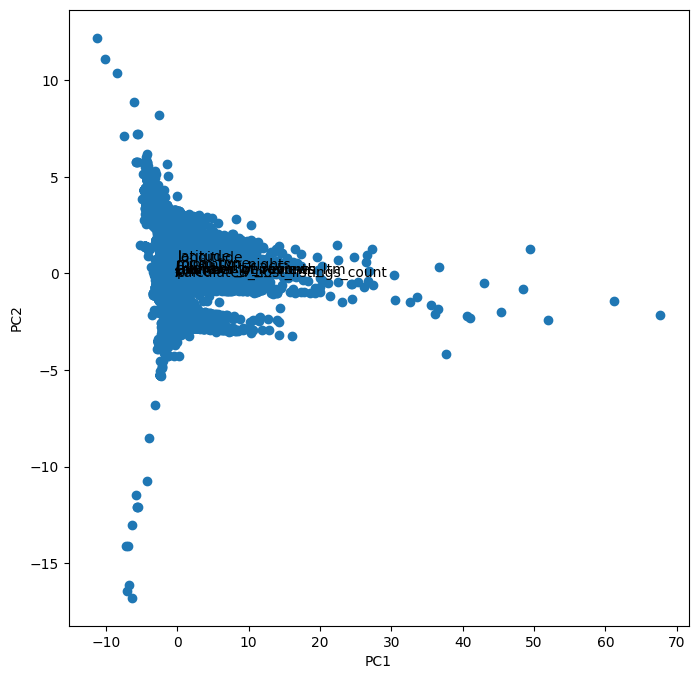

In [59]:
# biplot. source: Introduction to Statistical Learning https://github.com/intro-stat-learning/ISLP_labs
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pca.components_.shape[1]):
    ax.arrow(0, 0, pca.components_[i,k], pca.components_[j,k])
    print(data2.columns[k], f'(i,k)={i},{k}, (j,k)={j},{k}',  pca.components_[i,k], pca.components_[j,k])
    ax.text(pca.components_[i,k],
            pca.components_[j,k],
            data2.columns[k])

we really need to remove the outliners lol